<a href="https://colab.research.google.com/github/musiclip/practice_python_local/blob/main/20230831.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime

In [3]:
df = web.DataReader('005930', 'naver', start='2012-01-01', end='2023-08-29')

In [4]:
df_train = df.iloc[:2800, :]
df_test = df.iloc[2800:,:]

In [5]:
df = df.astype({'Close':'int'})

<Axes: xlabel='Date'>

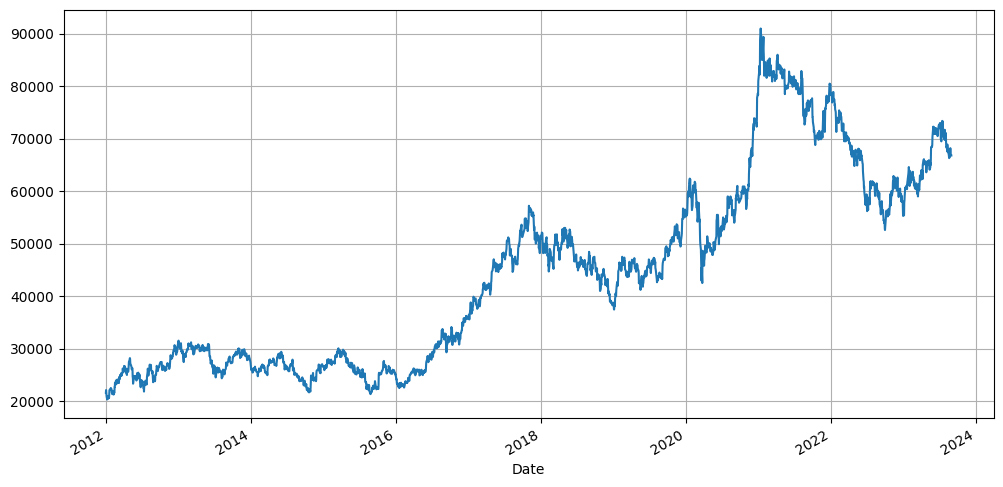

In [6]:
df.Close.plot(figsize = (12,6), grid = True)

In [7]:
df_train.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-09,65800,65800,65100,65300,9366861
2023-05-10,65500,65500,64300,64600,13057727
2023-05-11,64700,65100,64200,64200,11648905
2023-05-12,63700,64600,63600,64100,8693913
2023-05-15,64100,64600,63900,64500,8172021


In [8]:
x = np.arange(len(df_train)).reshape(-1, 1)

In [9]:
x

array([[   0],
       [   1],
       [   2],
       ...,
       [2797],
       [2798],
       [2799]])

In [10]:
len(x)

2800

In [11]:
y = df_train.Close.astype(float).to_numpy()

In [12]:
y

array([21600., 22100., 21600., ..., 64200., 64100., 64500.])

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

10차 방정식을 가정하여 회귀식을 구한다.

데이터 x: 0~2800 (1씩 증가)

데이터 x의 10차 항으로 만들어 줌 : x의 2차, 3차, 4차, 5차, 6차, 7차, 8차, 9차, 10차(교호작용) ==> 선형회귀에 적용 ==> 10차 방정식의 회귀식(다항회귀)

PolynomialFeatures : x를 10차항 식으로 변환해주는 라이브러리

Pipeline : LinearRegression과 PolynomialFeatures를 연결해주는 라이브러리

In [14]:
polynomial_features = PolynomialFeatures(degree = 10, include_bias= False)

In [15]:
linear_regression = LinearRegression()

In [16]:
pipline = Pipeline([('polynomial_features',polynomial_features),
                    ('linear_regression', linear_regression)])

In [17]:
pipline.fit(x, y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('linear_regression', LinearRegression())])

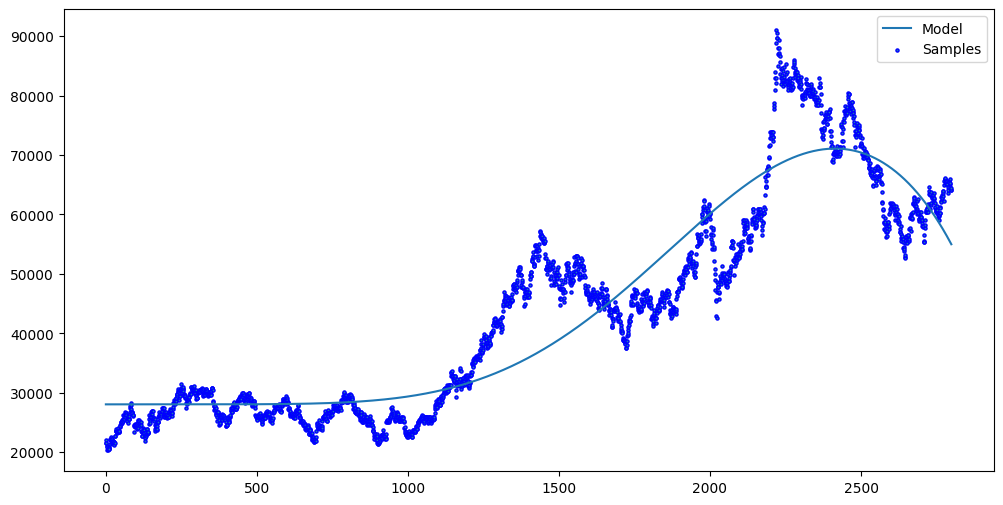

In [19]:
plt.figure(figsize = (12,6))
plt.plot(x, pipline.predict(x), label = 'Model')
plt.scatter(x,y,edgecolor = 'b', s=5, label = 'Samples')
plt.legend(loc = 'best')
plt.show()

In [23]:
from prophet import Prophet #페이스북에서 만든 선형회귀모델

In [24]:
df_prophet = df_train.Close

In [25]:
df_prophet

Date
2012-01-02    21600
2012-01-03    22100
2012-01-04    21600
2012-01-05    21100
2012-01-06    20800
              ...  
2023-05-09    65300
2023-05-10    64600
2023-05-11    64200
2023-05-12    64100
2023-05-15    64500
Name: Close, Length: 2800, dtype: object

In [26]:
df2 = df_prophet.reset_index()

In [27]:
df2.head()

,Date,Close
0,2012-01-02,21600
1,2012-01-03,22100
2,2012-01-04,21600
3,2012-01-05,21100
4,2012-01-06,20800


In [28]:
df2.columns = ['ds','y']

In [29]:
df2.head()

,ds,y
0,2012-01-02,21600
1,2012-01-03,22100
2,2012-01-04,21600
3,2012-01-05,21100
4,2012-01-06,20800


In [30]:
m = Prophet()

In [31]:
m.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf39sulck/5vgn0vao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf39sulck/7_8ad740.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76391', 'data', 'file=/tmp/tmpf39sulck/5vgn0vao.json', 'init=/tmp/tmpf39sulck/7_8ad740.json', 'output', 'file=/tmp/tmpf39sulck/prophet_modelg_mbbyzw/prophet_model-20230831012628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


m(회귀식)을 사용하여 미래값(= forecast) 값 산출 하기

1. m을 이용하여 미래 시간의 timestamp 만들기



In [32]:
datetime(2023, 8, 29) - datetime(2023, 5, 15)

datetime.timedelta(days=106)

In [33]:
future = m.make_future_dataframe(periods = 107)

In [34]:
future

,ds
0,2012-01-02
1,2012-01-03
2,2012-01-04
3,2012-01-05
4,2012-01-06
...,...
2902,2023-08-26
2903,2023-08-27
2904,2023-08-28
2905,2023-08-29


In [35]:
forecast = m.predict(future)

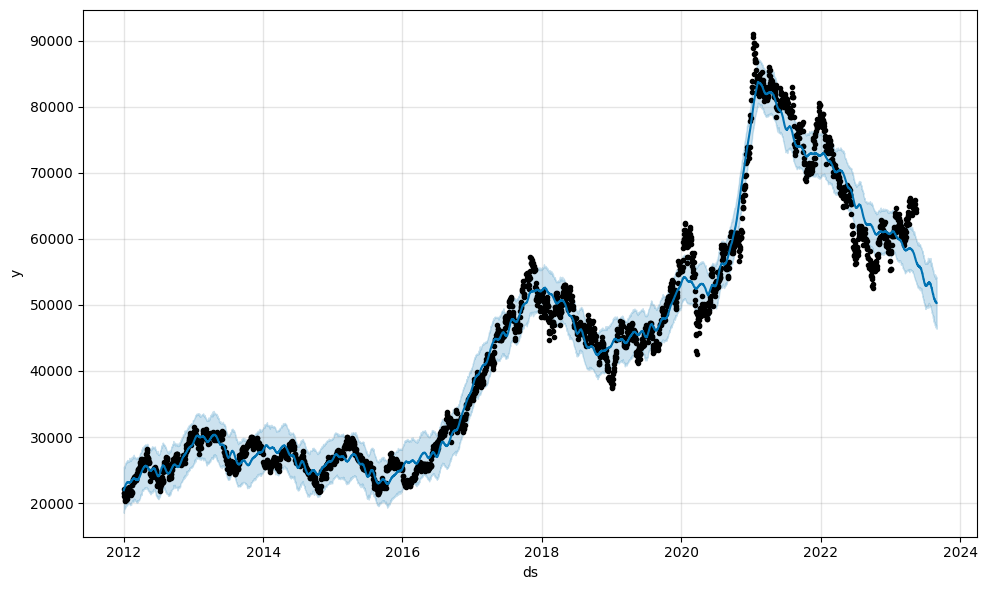

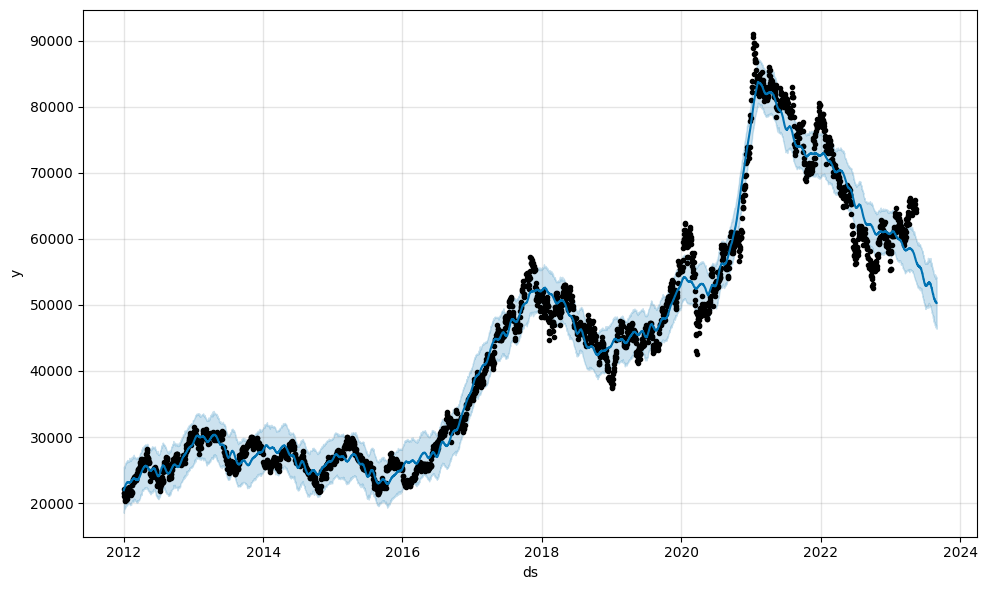

In [38]:
m.plot(forecast)

책) 실험계획법

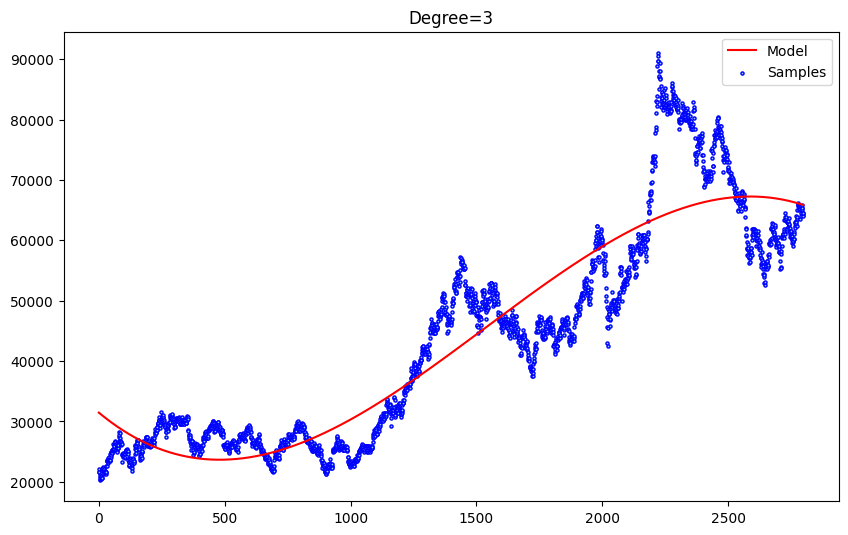

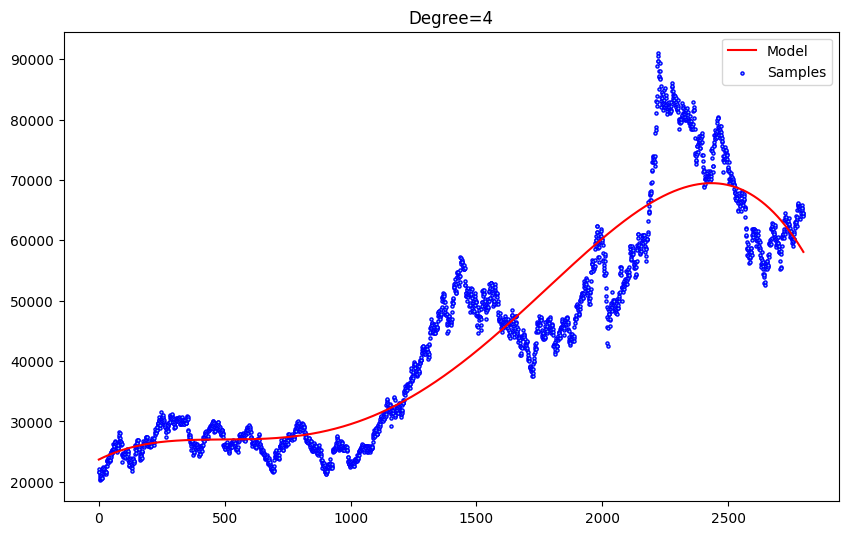

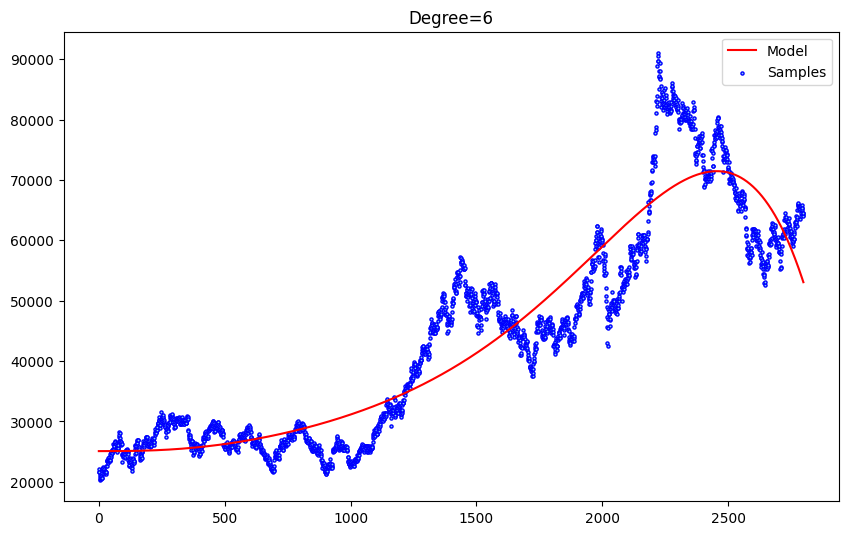

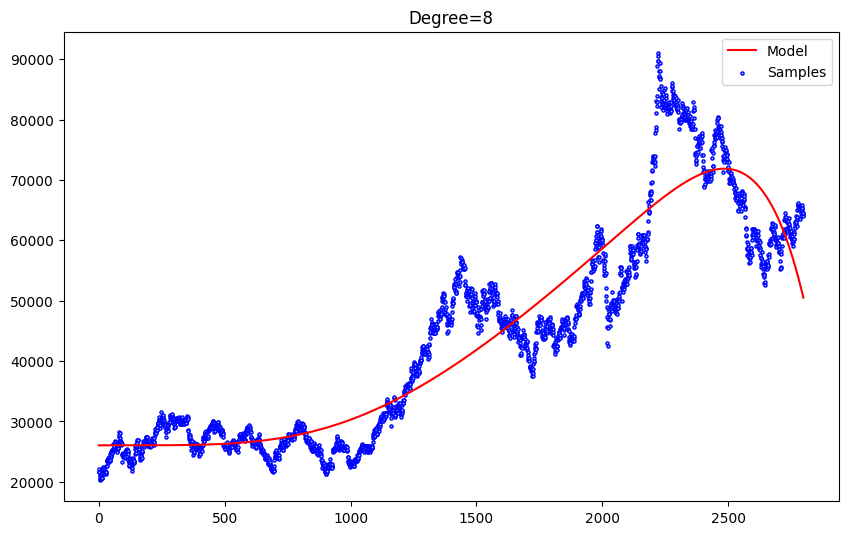

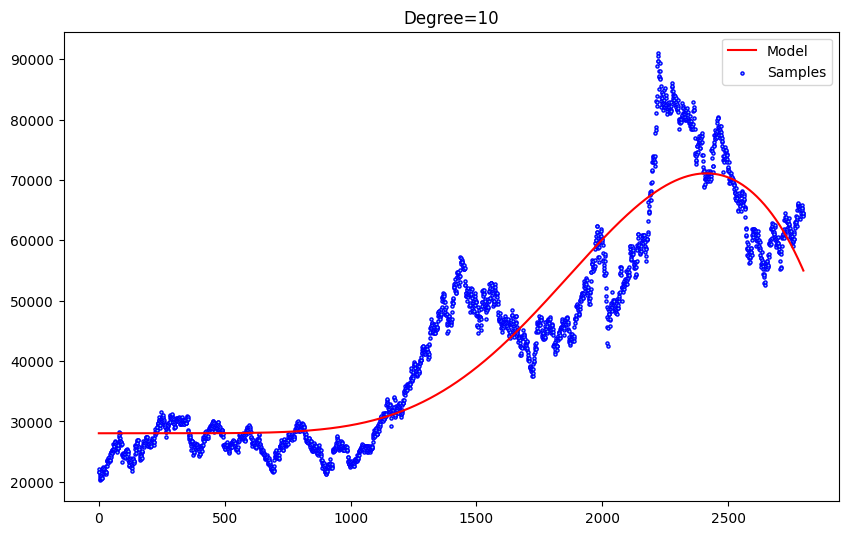

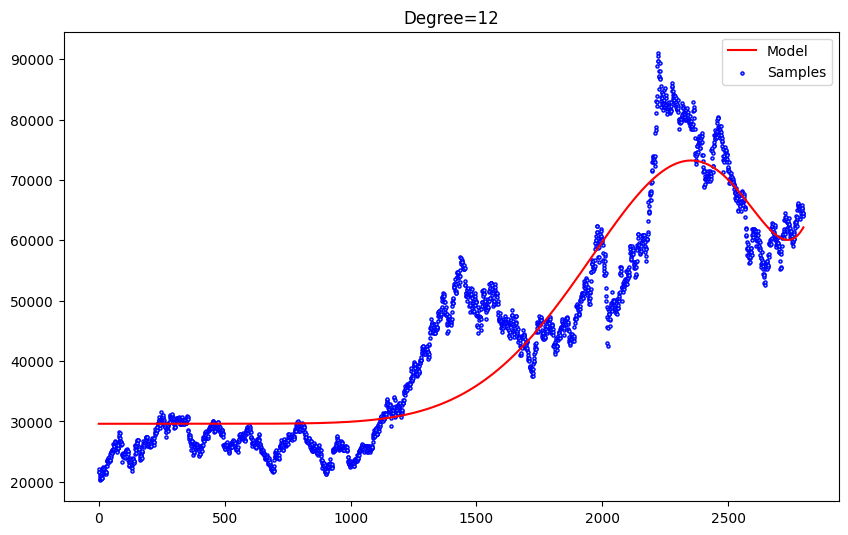

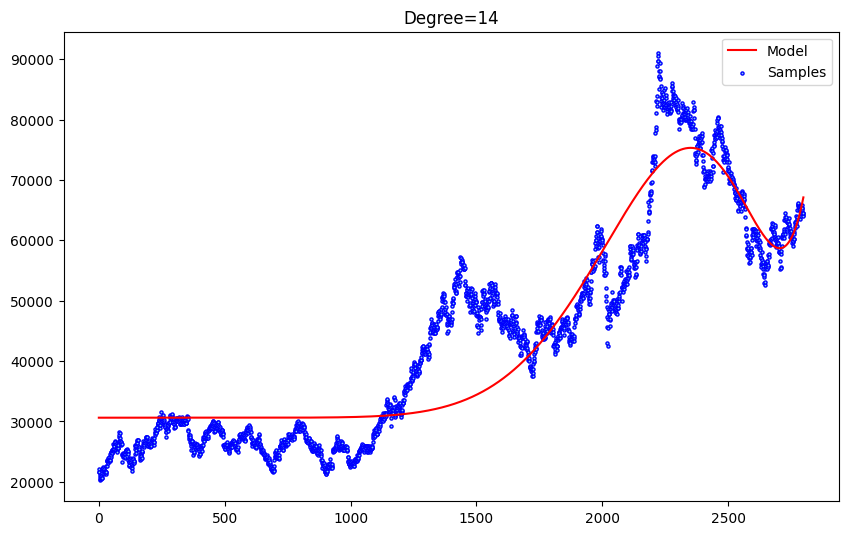

In [40]:
degree = [3, 4, 6, 8, 10, 12, 14]

X = x
for i, j in enumerate(degree):
    polynomial_features = PolynomialFeatures(degree=j, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline( [ ('polynomial_features', polynomial_features), ('linear_regression', linear_regression) ] )
    pipeline.fit(X, y)

    plt.figure(figsize=(10, 50))
    plt.subplot(7, 1, i+1)
    plt.plot(X, pipeline.predict(X), label='Model', color='red')
    plt.scatter(X, y, edgecolors='b', s=5, label='Samples', color='skyblue')
    plt.title(f'Degree={j}')
    plt.legend(loc='best')
    plt.show()

In [41]:
ls

sample_data/  temperature_ts_data


In [44]:
!head -40 ./temperature_ts_data

timestamp,temperature
2014-01-01 00:00:00,4.51929824561
2014-01-01 01:00:00,3.915
2014-01-01 02:00:00,3.62666666667
2014-01-01 03:00:00,3.44666666667
2014-01-01 04:00:00,3.19166666667
2014-01-01 05:00:00,3.26
2014-01-01 06:00:00,3.55166666667
2014-01-01 07:00:00,3.77833333333
2014-01-01 08:00:00,3.94833333333
2014-01-01 09:00:00,4.81333333333
2014-01-01 10:00:00,5.54333333333
2014-01-01 11:00:00,7.015
2014-01-01 12:00:00,7.385
2014-01-01 13:00:00,7.52166666667
2014-01-01 14:00:00,8.03833333333
2014-01-01 15:00:00,7.925
2014-01-01 16:00:00,7.43666666667
2014-01-01 17:00:00,6.865
2014-01-01 18:00:00,6.435
2014-01-01 19:00:00,
2014-01-01 20:00:00,6.48703703704
2014-01-01 21:00:00,6.00333333333
2014-01-01 22:00:00,5.29166666667
2014-01-01 23:00:00,4.62666666667
2014-01-02 00:00:00,3.76833333333
2014-01-02 01:00:00,3.145
2014-01-02 02:00:00,2.65666666667
2014-01-02 03:00:00,2.27333333333
2014-01-02 04:00:00,1.94333333333
2014-01-02 05:00:00,
2014-01-02 06:00:00,
2014-01-02 07:00:00,
2014-01

df 만들기

size, count 사용해서 일 평균 값, 평균 구할때 사용되어진 데이터의 개수



In [87]:
df = pd.read_csv('temperature_ts_data')
df.timestamp = pd.to_datetime(df.timestamp)
mean_size = df.groupby(df.timestamp.dt.date).temperature.agg(['mean','size','count'])
mean_size

,mean,size,count
timestamp,,,
2014-01-01,5.418464,24,23
2014-01-02,2.757333,24,5
2014-01-03,NaN,24,0
2014-01-04,2.196111,24,9
2014-01-05,0.746597,24,24
...,...,...,...
2014-12-27,-1.083194,24,24
2014-12-28,-0.439861,24,24
2014-12-29,3.284931,24,24


In [72]:
df = pd.read_csv('temperature_ts_data')
df

,timestamp,temperature
0,2014-01-01 00:00:00,4.519298
1,2014-01-01 01:00:00,3.915000
2,2014-01-01 02:00:00,3.626667
3,2014-01-01 03:00:00,3.446667
4,2014-01-01 04:00:00,3.191667
...,...,...
8755,2014-12-31 19:00:00,-2.916667
8756,2014-12-31 20:00:00,-3.626667
8757,2014-12-31 21:00:00,-3.953333
8758,2014-12-31 22:00:00,-4.681667


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8760 non-null   object 
 1   temperature  8477 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [84]:
df[40:60]

,timestamp,temperature
40,2014-01-02 16:00:00,NaN
41,2014-01-02 17:00:00,NaN
42,2014-01-02 18:00:00,NaN
43,2014-01-02 19:00:00,NaN
44,2014-01-02 20:00:00,NaN
45,2014-01-02 21:00:00,NaN
46,2014-01-02 22:00:00,NaN
47,2014-01-02 23:00:00,NaN
48,2014-01-03 00:00:00,NaN
49,2014-01-03 01:00:00,NaN


In [88]:
data_file = './temperature_ts_data'
data = pd.read_csv(data_file, parse_dates = [0], index_col = 0)

In [89]:
data.head()

,temperature
timestamp,
2014-01-01 00:00:00,4.519298
2014-01-01 01:00:00,3.915000
2014-01-01 02:00:00,3.626667
2014-01-01 03:00:00,3.446667
2014-01-01 04:00:00,3.191667


In [90]:
data.info()  #전체가 8760개, 8477개가 non-null이기 때문에 결측값

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  8477 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [93]:
daily_data = data.dropna().resample('D').agg(['mean','size'])

In [94]:
daily_data

temperature     
                  mean size
timestamp                  
2014-01-01    5.418464   23
2014-01-02    2.757333    5
2014-01-03         NaN    0
2014-01-04    2.196111    9
2014-01-05    0.746597   24
...                ...  ...
2014-12-27   -1.083194   24
2014-12-28   -0.439861   24
2014-12-29    3.284931   24
2014-12-30    3.472292   24
2014-12-31   -0.550000   24

[365 rows x 2 columns]

하루에 매시간 자료가 19개 이하이면 일평균 값을 'NaN'처리 한다.

In [97]:
daily_data.loc[daily_data.temperature['size']<19, ('temperature','mean')] = np.nan

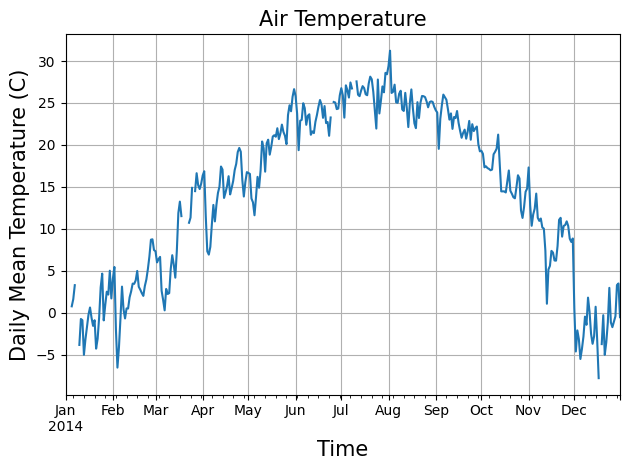

In [99]:
fig = daily_data.loc[:,('temperature','mean')].plot()
fig.set_title('Air Temperature', size = 15)
fig.set_xlabel('Time', size = 15)
fig.set_ylabel('Daily Mean Temperature (C)', size = 15)
fig.grid()
fig.get_figure().tight_layout()
fig.get_figure().savefig('all_data_plot.png')

In [103]:
df = daily_data.temperature['mean'].iloc[:120]

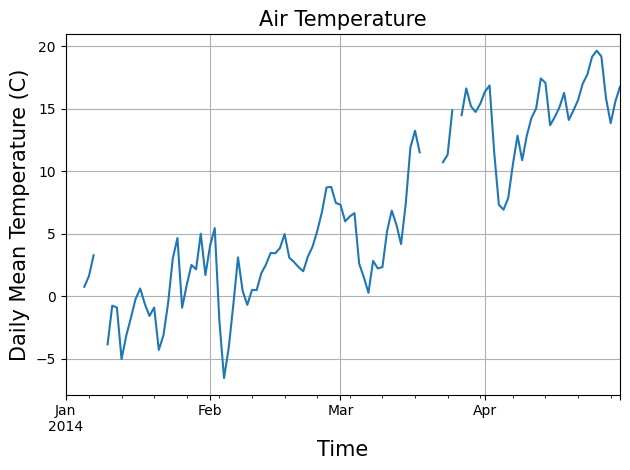

In [105]:
fig = df.plot()
fig.set_title('Air Temperature', size = 15)
fig.set_xlabel('Time', size = 15)
fig.set_ylabel('Daily Mean Temperature (C)', size = 15)
fig.grid()
fig.get_figure().tight_layout()
fig.get_figure().savefig('all_data_plot.png')

In [106]:
methods = ['linear','quadratic','cubic']

In [107]:
df_gapfilled = pd.DataFrame({m: df.interpolate(method = m) for m in methods})

In [109]:
df_gapfilled  #linear 직선 quadratic 2차방정식 cubic 3차방정식

,linear,quadratic,cubic
timestamp,,,
2014-01-01,5.418464,5.418464,5.418464
2014-01-02,4.250497,3.101056,4.529056
2014-01-03,3.082531,1.549943,2.956273
2014-01-04,1.914564,0.765123,1.446620
2014-01-05,0.746597,0.746597,0.746597
...,...,...,...
2014-04-26,19.178403,19.178403,19.178403
2014-04-27,15.826944,15.826944,15.826944
2014-04-28,13.839792,13.839792,13.839792


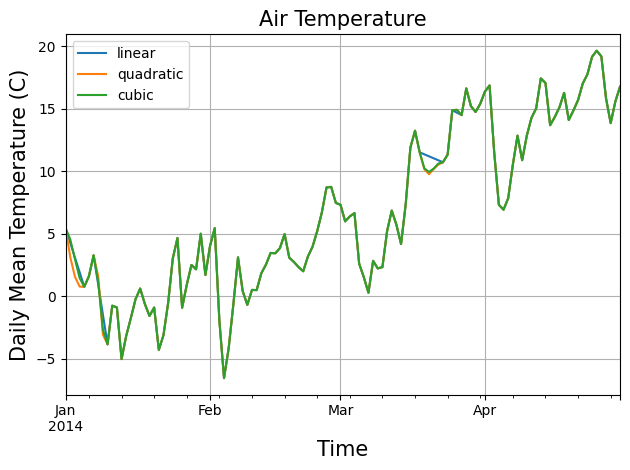

In [110]:
fig = df_gapfilled.plot()
fig.set_title('Air Temperature', size = 15)
fig.set_xlabel('Time', size = 15)
fig.set_ylabel('Daily Mean Temperature (C)', size = 15)
fig.grid()
fig.get_figure().tight_layout()
fig.get_figure().savefig('all_data_plot.png')

In [111]:
ls

 all_data_plot.png                           sample_data/
'통합 식품영양성분DB_수산물_20230831.xlsx'   temperature_ts_data


In [122]:
df = pd.read_excel('통합 식품영양성분DB_수산물_20230831.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [167]:
df = pd.read_excel('통합 식품영양성분DB_수산물_20230831.xlsx')
df = df.iloc[:,13:-2]

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [142]:
df

,에너지(㎉),수분(g),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총 식이섬유(g),칼슘(㎎),철(㎎),인(㎎),...,프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인(㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),냉산가용성물질(㎎),회분(g)
0,127,70.3,25.9,1.8,-,0.3,0,15,1.8,40,...,-,-,-,-,-,-,-,-,-,1.7
1,-,-,24.3,-,-,-,-,-,-,-,...,670,935,299,-,-,-,-,-,-,-
2,-,-,-,-,0.9,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,45.5,44.7,-,91.5,36.4,360.9,-
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,88,62.8,12,3.8,3.8,0.4,-,279,1.5,0,...,-,-,-,-,-,-,-,-,-,21
1362,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1363,-,-,-,-,0.1,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1364,-,-,-,-,2.1,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [168]:
df.replace('-',np.nan, inplace = True)

In [169]:
df.astype(float)

,에너지(㎉),수분(g),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총 식이섬유(g),칼슘(㎎),철(㎎),인(㎎),...,프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인(㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),냉산가용성물질(㎎),회분(g)
0,127.0,70.3,25.9,1.8,NaN,0.3,0.0,15.0,1.8,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7
1,NaN,NaN,24.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,670.0,935.0,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,45.5,44.7,NaN,91.5,36.4,360.9,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,88.0,62.8,12.0,3.8,3.8,0.4,NaN,279.0,1.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
1362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1363,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1364,NaN,NaN,NaN,NaN,2.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
sum_by_nutrient = df.agg(['sum','count'])

<ipython-input-170-c7c5d3b28faa>:1: FutureWarning: ['에너지(㎉)', '수분(g)', '단백질(g)', '지방(g)', '지질-가식부 100g당', '탄수화물(g)', '총 식이섬유(g)', '칼슘(㎎)', '철(㎎)', '인(㎎)', '셀레늄(㎍)', '레티놀(㎍)', '레티놀A효능', '비타민 B1(㎎)', '비타민 B2(㎎)', '나이아신(㎎)', '비타민 C(㎎)', '총 아미노산(g)', '이소류신(㎎)', '류신(㎎)', '라이신(㎎)', '메티오닌(㎎)', '페닐알라닌(㎎)', '트레오닌(㎎)', '트립토판(㎎)', '발린(㎎)', '히스티딘(㎎)', '아르기닌(㎎)', '티로신(㎎)', '시스테인(㎎)', '알라닌(㎎)', '아스파르트산(㎎)', '글루탐산(㎎)', '글리신(㎎)', '프롤린(㎎)', '세린(㎎)', '타우린(㎎)', '글리신 베타인(㎎)', '호마린(㎎)', '트리고넬린(㎎)', '리보핵산(㎎)', '데옥시리보핵산(㎎)', '냉산가용성물질(㎎)', '회분(g)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sum_by_nutrient = df.agg(['sum','count'])


In [171]:
sum_by_nutrient

,에너지(㎉),수분(g),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총 식이섬유(g),칼슘(㎎),철(㎎),인(㎎),...,프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인(㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),냉산가용성물질(㎎),회분(g)
count,505,505,856,509,432,505,326,504,504,408,...,409,409,409,68,68,67,61,61,61,505


In [218]:
df_fish = pd.read_excel('통합 식품영양성분DB_수산물_20230831.xlsx')
df_animal = pd.read_excel('통합 식품영양성분DB_농축산물_20230831.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [324]:
df_f = df_fish.copy()
df_f = df_f.iloc[:,13:-2]
df_f.replace('-', 0, inplace = True)
df_f = df_f.astype(float)
nutrient = pd.concat([df_f.agg('sum'), df_f.agg(lambda x: x[x!=0].count())], axis=0, keys=['sum', 'count'])

def top_sum10(df):
    top_10_sum = df.loc['sum'].sort_values(ascending=False).head(10)
    return top_10_sum

result_s = top_sum10(nutrient)

def top_count10(df):
    top_10_count = df.loc['count'].sort_values(ascending=False).head(10)
    return top_10_count

result_c = top_count10(nutrient)

df_a = df_animal.copy()
food_name_column = df_a['식품명']
df_a = df_a.iloc[:, 12:-2]
df_a['식품명'] = food_name_column

def find_food(df, data):
    food_data = {}
    for i in range(10):
        if data.index[i] in df.columns:
            sorted_df = df.sort_values(by= data.index[i], ascending=False).head(3)['식품명']
            food_data[data.index[i]] = sorted_df.tolist()
    return food_data

result_food = find_food(df_a, result_s)
df_food_s = pd.DataFrame(result_food)
df_food_s

result_food = find_food(df_a, result_c)  #df_a에 지질-가식부 100g당 이라는 항목이 없어서 9개만 산출했습니다.
df_food_c = pd.DataFrame(result_food)
df_food_c

,단백질(g),에너지(㎉),탄수화물(g),수분(g),회분(g),지방(g),칼슘(㎎),철(㎎),세린(㎎)
0,우롱차,쌀겨기름(미강유),"돔, 옥돔, 구운것",쇠기름,"아세로라 주스, 과즙 음료(10%)","커피, 원두","설탕, 각설탕","다랑어, 가다랑어 육수","캐슈넛, 조미, 볶은것"
1,"달걀, 스크램블에그",올리브유,"만새기, 생것","설탕, 각설탕","칵테일, 페퍼민트, 알코올 20%",럼,과당,과당,"병아리콩, 말린것"
2,"옥수수, 메옥수수, 말린것",들기름,"크릴, 삶은것",보리차,"설탕, 빙설탕","콜라비, 데친것","당밀, 가공당",우롱차,"미나리, 물미나리, 잎, 생것"


In [397]:
df_f = df_fish.copy()
df_f = df_f.iloc[:,13:-2]
df_f.replace('-', 0, inplace = True)
df_f = df_f.astype(float)
nutrient = pd.concat([df_f.agg('sum'), df_f.agg(lambda x: x[x!=0].count())], axis=0, keys=['sum', 'count'])

In [399]:
type(nutrient)

pandas.core.series.Series

In [383]:
df_fish = pd.read_excel('통합 식품영양성분DB_수산물_20230831.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [385]:
df_f = df_fish.copy()
df_f = df_f.iloc[:,13:-2]

In [386]:
df_f

,에너지(㎉),수분(g),단백질(g),지방(g),지질-가식부 100g당,탄수화물(g),총 식이섬유(g),칼슘(㎎),철(㎎),인(㎎),...,프롤린(㎎),세린(㎎),타우린(㎎),글리신 베타인(㎎),호마린(㎎),트리고넬린(㎎),리보핵산(㎎),데옥시리보핵산(㎎),냉산가용성물질(㎎),회분(g)
0,127,70.3,25.9,1.8,-,0.3,0,15,1.8,40,...,-,-,-,-,-,-,-,-,-,1.7
1,-,-,24.3,-,-,-,-,-,-,-,...,670,935,299,-,-,-,-,-,-,-
2,-,-,-,-,0.9,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,45.5,44.7,-,91.5,36.4,360.9,-
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,88,62.8,12,3.8,3.8,0.4,-,279,1.5,0,...,-,-,-,-,-,-,-,-,-,21
1362,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1363,-,-,-,-,0.1,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1364,-,-,-,-,2.1,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


df.info(verbose=True, null_counts=True)

In [396]:
def top_sum10(df):
    top_10_sum = df.loc['sum'].sort_values(ascending=False).head(10)
    return top_10_sum
result_s = top_sum10(nutrient)

def top_count10(df):
    top_10_count = df.loc['count'].sort_values(ascending=False).head(10)
    return top_10_count
result_c = top_count10(nutrient)

def find_food(df, data):
    food_data = {}
    for i in range(10):
        if data.index[i] in df.columns:
            sorted_df = df.sort_values(by= data.index[i], ascending=False).head(3)['식품명']
            food_data[data.index[i]] = sorted_df.tolist()
    return food_data

df_f = df_fish.copy()
df_f = df_f.iloc[:,13:-2]
df_f.replace('-', 0, inplace = True)
df_f = df_f.astype(float)
nutrient = pd.concat([df_f.agg('sum'), df_f.agg(lambda x: x[x!=0].count())], axis=0, keys=['sum', 'count'])

df_a = df_animal.copy()
food_name_column = df_a['식품명']
df_a = df_a.iloc[:, 12:-2]
df_a = df_a.apply(pd.to_numeric, errors='coerce')
df_a['식품명'] = food_name_column
#()값이 음수값이라고 생각

#영양소 섭취양이 높은 것이 수산물에 제일 많은 영양소라고 생각

result_food = find_food(df_a, result_s)
df_food_s = pd.DataFrame(result_food)
df_food_s

#영양소의 개수가 많은 것이 수산물에 제일 많은 영양소라고 생각

result_food = find_food(df_a, result_c)  #df_a에 지질-가식부 100g당 이라는 항목이 없어서 9개만 산출했습니다.
df_food_c = pd.DataFrame(result_food)
df_food_c

,단백질(g),에너지(㎉),탄수화물(g),수분(g),회분(g),지방(g),칼슘(㎎),철(㎎),세린(㎎)
0,"명태, 먹태, 포, 말린것",쌀겨기름(미강유),"설탕, 각설탕",보리차,"소금, 가공염, 죽염",아몬드유,"팽창제, 베이킹파우더","진두발, 말린것","달걀, 가루"
1,"달걀, 가루",올리브유,"설탕, 백설탕","탄산 음료, 소다수",소금,땅콩기름,"게, 방게, 생것","날치, 염장","명태, 노가리, 말린것"
2,"상어, 지느러미, 생것",들기름,과당,보이차,"소금, 정제염",잇꽃씨기름,"새우, 꽃새우, 삶아서 말린것","장어, 붕장어, 뼈, 튀긴것","두부, 동두부, 동결건조"


In [403]:

df_f = df_fish.copy()
df_f = df_f.iloc[:,13:-2]
df_f.replace('-', 0, inplace = True)
df_f = df_f.astype(float)
nutrient = pd.concat([df_f.agg('sum'), df_f.agg(lambda x: x[x!=0].count())], axis=0, keys=['sum', 'count'])


In [ ]:
nutrient.loc['sum']

In [393]:
df_f = df_fish.copy()
df_f = df_f.iloc[:,13:-2]
df_f = df_f.apply(pd.to_numeric, errors = 'coerce')
df_sc = df_f.agg(['sum','count'],axis=0)

In [ ]:
df_sc.loc['sum']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [417]:
def top_sum10(df,n):
    top_10_sum = df.sum().sort_values(ascending=False).head(n)
    return top_10_sum


def top_count10(df,n):
    top_10_count = df.count().sort_values(ascending=False).head(n)
    return top_10_count


def find_food(df, data):
    food_data = {}
    for i in range(len(data)):
        if data.index[i] in df.columns:
            sorted_df = df.sort_values(by= data.index[i], ascending=False).head(3)['식품명']
            food_data[data.index[i]] = sorted_df.tolist()
    return food_data

df_f = df_fish.copy()
df_f = df_f.iloc[:,13:-2]
df_f = df_f.apply(pd.to_numeric, errors = 'coerce')
df_sc = df_f.agg(['sum','count'],axis=0)

result_s = top_sum10(df_f,10)
result_c = top_count10(df_f,10)

df_a = df_animal.copy()
food_name_column = df_a['식품명']
df_a = df_a.iloc[:, 12:-2]
df_a = df_a.apply(pd.to_numeric, errors='coerce')
df_a['식품명'] = food_name_column
#()값이 음수값이라고 생각

#영양소 섭취양이 높은 것이 수산물에 제일 많은 영양소라고 생각

result_food = find_food(df_a, result_s)
df_food_s = pd.DataFrame(result_food)
df_food_s

#영양소의 개수가 많은 것이 수산물에 제일 많은 영양소라고 생각

result_food = find_food(df_a, result_c)  #df_a에 지질-가식부 100g당 이라는 항목이 없어서 9개만 산출했습니다.
df_food_c = pd.DataFrame(result_food)
df_food_c

,단백질(g),지방(g),에너지(㎉),탄수화물(g),수분(g),회분(g),나이아신(㎎),철(㎎),비타민 B2(㎎),칼슘(㎎)
0,"명태, 먹태, 포, 말린것",아몬드유,쌀겨기름(미강유),"설탕, 각설탕",보리차,"소금, 가공염, 죽염","돼지 부산물, 신장, 생것","진두발, 말린것","장어, 칠성장어, 말린것","팽창제, 베이킹파우더"
1,"달걀, 가루",땅콩기름,올리브유,"설탕, 백설탕","탄산 음료, 소다수",소금,"싸리버섯, 생것","날치, 염장","장어, 칠성장어, 생것","게, 방게, 생것"
2,"상어, 지느러미, 생것",잇꽃씨기름,들기름,과당,보이차,"소금, 정제염","밤버섯, 생것","장어, 붕장어, 뼈, 튀긴것","김, 참김, 구운것","새우, 꽃새우, 삶아서 말린것"


In [414]:
df_sc.sum()

에너지(㎉)            61173.000
수분(g)             35925.900
단백질(g)            17092.100
지방(g)              2070.500
지질-가식부 100g당       2175.100
탄수화물(g)            2172.496
총 식이섬유(g)           442.700
칼슘(㎎)             93759.000
철(㎎)               2440.600
인(㎎)             119320.000
셀레늄(㎍)              283.000
레티놀(㎍)            21893.000
레티놀A효능           119228.000
비타민 B1(㎎)           545.110
비타민 B2(㎎)           584.670
나이아신(㎎)            2094.700
비타민 C(㎎)           1231.000
총 아미노산(g)          7587.500
이소류신(㎎)          343455.000
류신(㎎)            594536.000
라이신(㎎)           599500.000
메티오닌(㎎)          178874.000
페닐알라닌(㎎)         309074.000
트레오닌(㎎)          325374.000
트립토판(㎎)          119745.000
발린(㎎)            372622.000
히스티딘(㎎)          239214.000
아르기닌(㎎)          509963.000
티로신(㎎)           262565.000
시스테인(㎎)           76349.000
알라닌(㎎)           456501.000
아스파르트산(㎎)        710876.000
글루탐산(㎎)         1086213.000
글리신(㎎)           294334.000
프롤린(㎎)           288461.000
세린(㎎)            301

In [ ]:
def replace_pattern_with_negative_value(cell):
    if isinstance(cell, str):
        pattern = r'\((\d+\.*\d*)\)'
        match = re.search(pattern, cell)
        if match:
            number_in_parentheses = float(match.group(1))
            return -number_in_parentheses
    return cell
#챗지피티로 정규표현식 얻어

In [362]:
import re

def replace_pattern_with_negative_value(cell):
    if isinstance(cell, str):
        pattern = r'\((\d+\.*\d*)\)'
        match = re.search(pattern, cell)
        if match:
            number_in_parentheses = float(match.group(1))
            return -number_in_parentheses
    return cell

# 괄호 안의 숫자를 -값으로 변환하여 데이터프레임 업데이트
df_a.iloc[:, 1:] = df_a.iloc[:, 1:].applymap(replace_pattern_with_negative_value)

df_a

,에너지(㎉),수분(g),단백질(g),지방(g),탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),...,오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산(18:2t)(㎎),트랜스 리놀렌산(18:3t)(㎎),식염상당량(g),회분(g),폐기율(%),식품명
0,380,11.5,11.4,7.35,67.71,0.32,0.32,0,0,0,...,0.05,2.5,0,0.0,0,0,0,2,0,"귀리, 겉귀리, 도정, 생것"
1,388,11.6,11.14,8.9,66.66,0.91,0.83,0,0.08,0,...,0.07,2.8,0.01,0.0,3.58,5.25,0,1.7,0,"귀리, 쌀귀리, 도정, 생것"
2,386,11.8,11.51,8.78,66.1,0.91,0.84,0,0.07,0,...,0.08,2.88,0.01,0.0,4.05,5.04,0,1.81,0,"귀리, 쌀귀리, 대양, 도정, 생것"
3,390,11.4,10.78,9.01,67.23,0.91,0.83,0,0.08,0,...,0.07,2.71,0.01,0.0,3.11,5.45,0,1.6,0,"귀리, 쌀귀리, 조양, 도정, 생것"
4,218,50.7,6.51,5.36,36.54,0.42,0.42,0,0,0,...,0.04,1.64,0.01,0.0,2.36,3.59,0,0.95,0,"귀리, 쌀귀리, 도정, 밥"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,51,4,0.1,0,24.1,0,-,-,-,-,...,-,-,-,0.0,-,-,20,71.8,0,"팽창제, 베이킹파우더"
3266,307,8.7,37.1,6.8,43.1,0.1,0,0.1,0,-,...,0.01,0.03,-,0.0,-,-,0.3,4.3,0,"팽창제, 효모, 말린것"
3267,642,2.1,0.5,50.3,46.9,-,-,-,-,-,...,-,-,-,0.0,-,-,0,0.2,-,프로폴리스
3268,122,74.7,15.78,5.2,2.9,0,0,0,0,0,...,0.01,0.38,0,0.0,0,0,0.1,1.42,0,"흰점박이 꽃무지, 유충, 생것"


In [380]:
df_a = df_animal.copy()
food_name_column = df_a['식품명']
df_a = df_a.iloc[:, 12:-2]
df_a = df_a.apply(pd.to_numeric, errors='coerce')
df_a['식품명'] = food_name_column
df_a.sort_values('단백질(g)', ascending = False)

,에너지(㎉),수분(g),단백질(g),지방(g),탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),...,오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산(18:2t)(㎎),트랜스 리놀렌산(18:3t)(㎎),식염상당량(g),회분(g),폐기율(%),식품명
2257,372,11.30,82.7,2.40,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.2,3.60,0.0,"명태, 먹태, 포, 말린것"
2064,376,8.54,82.4,0.04,4.47,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.1,4.55,0.0,"달걀, 가루"
2360,341,18.40,80.7,0.00,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.90,0.0,"상어, 지느러미, 생것"
2261,349,12.80,79.0,0.40,2.80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.1,5.00,0.0,"명태, 황태, 포, 말린것"
2526,349,14.10,77.6,0.40,4.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.8,3.50,0.0,"가리비, 말린것"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,0,99.80,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.10,0.0,우롱차
2955,33,91.70,NaN,NaN,8.30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,"홍차, 레몬"
3162,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.29,2.05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"미트볼, 냉동"
3185,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"스튜, 레토르트"


In [ ]:
sorted_df = df.sort_values(by=data.index[i], ascending=False, na_position='last').head(3)['식품명']

In [327]:
sorted_df = df_a.sort_values(by= result_c.index[1], ascending=False).head(3)['식품명']

In [329]:
result_c.index[1]

'에너지(㎉)'

In [328]:
sorted_df

2884    쌀겨기름(미강유)
2890         올리브유
2873          들기름
Name: 식품명, dtype: object

In [325]:
result_food

{'단백질(g)': ['우롱차', '달걀, 스크램블에그', '옥수수, 메옥수수, 말린것'],
 '에너지(㎉)': ['쌀겨기름(미강유)', '올리브유', '들기름'],
 '탄수화물(g)': ['돔, 옥돔, 구운것', '만새기, 생것', '크릴, 삶은것'],
 '수분(g)': ['쇠기름', '설탕, 각설탕', '보리차'],
 '회분(g)': ['아세로라 주스, 과즙 음료(10%)', '칵테일, 페퍼민트, 알코올 20%', '설탕, 빙설탕'],
 '지방(g)': ['커피, 원두', '럼', '콜라비, 데친것'],
 '칼슘(㎎)': ['설탕, 각설탕', '과당', '당밀, 가공당'],
 '철(㎎)': ['다랑어, 가다랑어 육수', '과당', '우롱차'],
 '세린(㎎)': ['캐슈넛, 조미, 볶은것', '병아리콩, 말린것', '미나리, 물미나리, 잎, 생것']}

In [323]:
index_of_zijil = df_a.columns.get_loc('가식부')
print(index_of_zijil)

KeyError: ignored

In [313]:
df_a = df_animal.copy()
food_name_column = df_a['식품명']
df_a = df_a.iloc[:, 12:-2]
df_a['식품명'] = food_name_column

In [332]:
df_a.sort_values(by = '단백질(g)',ascending=False)

,에너지(㎉),수분(g),단백질(g),지방(g),탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),유당(g),...,오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산(18:2t)(㎎),트랜스 리놀렌산(18:3t)(㎎),식염상당량(g),회분(g),폐기율(%),식품명
2930,0,99.8,Tr,(0),0.1,-,-,-,-,-,...,-,-,-,NaN,-,-,0,0.1,0,우롱차
2067,149,76.4,9.99,10.98,1.61,1.39,0,0.28,0,1.11,...,-,-,0.624,NaN,-,-,0.4,1.01,0,"달걀, 스크램블에그"
332,358,10.7,9.94,3.83,74.12,1.94,1.06,0.82,0.04,0,...,0.05,1.78,0.01,NaN,5.08,0.47,0,1.41,0,"옥수수, 메옥수수, 말린것"
178,419,4.2,9.92,8.67,75.37,16.84,16.84,0,0,0,...,0.09,1.62,0.05,NaN,36.59,7.24,1.2,1.84,0,"과자, 건빵"
1746,344,57.5,9.9,32.1,0,-,-,-,-,-,...,-,-,-,NaN,-,-,0.2,0.5,-,"돼지 부산물, 직장, 생것"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,19,(95),(0.3),0,(4.7),(0),(0),(Tr),(0),(0),...,(0),(0),-,NaN,-,-,0,0,0,"멥쌀, 백미, 미음"
86,20,(95),(0.3),(0.1),(4.6),0,(Tr),(Tr),(0),(0),...,(Tr),(0.03),-,NaN,-,-,0,0,0,"멥쌀, 칠분도미, 미음"
536,342,9,(0),(0),91,(88.2),(0),(85.5),(0),(0),...,-,-,-,NaN,-,-,0,0,0,포도당
490,375,0.1,(0),(0),99.9,(99.9),(0),(0),(99.9),(0),...,-,-,-,NaN,-,-,0,0,0,과당


In [311]:
result_c

단백질(g)          856.0
에너지(㎉)          505.0
탄수화물(g)         505.0
수분(g)           505.0
회분(g)           505.0
지방(g)           505.0
칼슘(㎎)           488.0
철(㎎)            483.0
지질-가식부 100g당    432.0
세린(㎎)           409.0
dtype: float64

In [281]:
result_c

단백질(g)          856.0
에너지(㎉)          505.0
탄수화물(g)         505.0
수분(g)           505.0
회분(g)           505.0
지방(g)           505.0
칼슘(㎎)           488.0
철(㎎)            483.0
지질-가식부 100g당    432.0
세린(㎎)           409.0
dtype: float64

In [254]:
df_test = pd.DataFrame(sorted_df)

In [255]:
df_test

,식품명
2884,쌀겨기름(미강유)
2890,올리브유
2873,들기름


In [214]:
ls

 all_data_plot.png                             sample_data/
'통합 식품영양성분DB_농축산물_20230831.xlsx'   temperature_ts_data
'통합 식품영양성분DB_수산물_20230831.xlsx'


In [216]:
df_animal = pd.read_excel('통합 식품영양성분DB_농축산물_20230831.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [234]:
df_a = df_animal.copy()

In [235]:
df_a

,NO,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,식품대분류,식품상세분류,...,오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산(18:2t)(㎎),트랜스 리놀렌산(18:3t)(㎎),식염상당량(g),회분(g),폐기율(%),성분표출처,발행기관
0,1,R000001-ZZ-AVG,R000001,농축산물,품목대표,"귀리, 겉귀리, 도정, 생것",2022,전국(대표),농축산물,곡류 및 그 제품,...,2.5,0,NaN,0,0,0,2,0,농진청('16),국립농업과학원
1,2,R000002-ZZ-AVG,R000002,농축산물,품목대표,"귀리, 쌀귀리, 도정, 생것",2022,전국(대표),농축산물,곡류 및 그 제품,...,2.8,0.01,NaN,3.58,5.25,0,1.7,0,농진청('20),국립농업과학원
2,3,R000003-ZZ-AVG,R000003,농축산물,품목대표,"귀리, 쌀귀리, 대양, 도정, 생것",2022,전국(대표),농축산물,곡류 및 그 제품,...,2.88,0.01,NaN,4.05,5.04,0,1.81,0,농진청('20),국립농업과학원
3,4,R000004-ZZ-AVG,R000004,농축산물,품목대표,"귀리, 쌀귀리, 조양, 도정, 생것",2022,전국(대표),농축산물,곡류 및 그 제품,...,2.71,0.01,NaN,3.11,5.45,0,1.6,0,농진청('20),국립농업과학원
4,5,R000005-ZZ-AVG,R000005,농축산물,품목대표,"귀리, 쌀귀리, 도정, 밥",2022,전국(대표),농축산물,곡류 및 그 제품,...,1.64,0.01,NaN,2.36,3.59,0,0.95,0,농진청('20),국립농업과학원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,3266,R003266-ZZ-AVG,R003266,농축산물,품목대표,"팽창제, 베이킹파우더",2022,전국(대표),농축산물,기타,...,-,-,NaN,-,-,20,71.8,0,USDA('18),국립농업과학원
3266,3267,R003267-ZZ-AVG,R003267,농축산물,품목대표,"팽창제, 효모, 말린것",2022,전국(대표),농축산물,기타,...,0.03,-,NaN,-,-,0.3,4.3,0,JAPAN('20),국립농업과학원
3267,3268,R003268-ZZ-AVG,R003268,농축산물,품목대표,프로폴리스,2022,전국(대표),농축산물,기타,...,-,-,NaN,-,-,0,0.2,-,농진청('05),국립농업과학원
3268,3269,R003269-ZZ-AVG,R003269,농축산물,품목대표,"흰점박이 꽃무지, 유충, 생것",2022,전국(대표),농축산물,기타,...,0.38,0,NaN,0,0,0.1,1.42,0,농진청('15),국립농업과학원


In [236]:
food_name_column = df_a['식품명']
df_a = df_a.iloc[:, 12:-2]
df_a.insert(0, '식품명', food_name_column)

In [238]:
df_a

,식품명,에너지(㎉),수분(g),단백질(g),지방(g),탄수화물(g),총당류(g),자당(g),포도당(g),과당(g),...,도코사헥사에노산(22:6(n-3))(㎎),오메가 3 지방산(g),오메가 6 지방산(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(㎎),트랜스 리놀레산(18:2t)(㎎),트랜스 리놀렌산(18:3t)(㎎),식염상당량(g),회분(g),폐기율(%)
0,"귀리, 겉귀리, 도정, 생것",380,11.5,11.4,7.35,67.71,0.32,0.32,0,0,...,0,0.05,2.5,0,NaN,0,0,0,2,0
1,"귀리, 쌀귀리, 도정, 생것",388,11.6,11.14,8.9,66.66,0.91,0.83,0,0.08,...,0,0.07,2.8,0.01,NaN,3.58,5.25,0,1.7,0
2,"귀리, 쌀귀리, 대양, 도정, 생것",386,11.8,11.51,8.78,66.1,0.91,0.84,0,0.07,...,0,0.08,2.88,0.01,NaN,4.05,5.04,0,1.81,0
3,"귀리, 쌀귀리, 조양, 도정, 생것",390,11.4,10.78,9.01,67.23,0.91,0.83,0,0.08,...,0,0.07,2.71,0.01,NaN,3.11,5.45,0,1.6,0
4,"귀리, 쌀귀리, 도정, 밥",218,50.7,6.51,5.36,36.54,0.42,0.42,0,0,...,0,0.04,1.64,0.01,NaN,2.36,3.59,0,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,"팽창제, 베이킹파우더",51,4,0.1,0,24.1,0,-,-,-,...,0,-,-,-,NaN,-,-,20,71.8,0
3266,"팽창제, 효모, 말린것",307,8.7,37.1,6.8,43.1,0.1,0,0.1,0,...,0,0.01,0.03,-,NaN,-,-,0.3,4.3,0
3267,프로폴리스,642,2.1,0.5,50.3,46.9,-,-,-,-,...,-,-,-,-,NaN,-,-,0,0.2,-
3268,"흰점박이 꽃무지, 유충, 생것",122,74.7,15.78,5.2,2.9,0,0,0,0,...,0,0.01,0.38,0,NaN,0,0,0.1,1.42,0
